## Выравнивание картинки с номером перед распознаванием

In [1]:
import os
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

In [3]:
# загружаем тестовую картинку
%%capture
!wget https://www.draginda.org/internship_materials/test_area_skewed.jpeg

In [4]:
# функции выравнивания
def rotate_image(image, angle):
    (h, w) = image.shape[: 2]
    center = (w // 2, h // 2)
    M = cv2.getRotationMatrix2D(center, angle, 1.0)
    corrected = cv2.warpAffine(image, M, (w, h), flags = cv2.INTER_CUBIC, \
        borderMode = cv2.BORDER_REPLICATE)
    return corrected

def determine_score(arr):
     histogram = np.sum(arr, axis = 2, dtype = float)
     score = np.sum((histogram[..., 1 :] - histogram[..., : -1]) ** 2, axis = 1, dtype = float)
     return score

def correct_skew(image, delta = 0.1, limit = 5):
     image = image.astype("uint8")
     image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
     thresh = cv2.threshold(image, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)[1]
     angles = np.arange(-limit, limit + delta, delta)
     img_stack = np.stack([rotate_image(thresh, angle) for angle in angles], axis = 0)
     scores = determine_score(img_stack)
     best_angle = angles[np.argmax(scores)]
     corrected = rotate_image(image, best_angle)
     return best_angle, corrected

Исходная картинка:


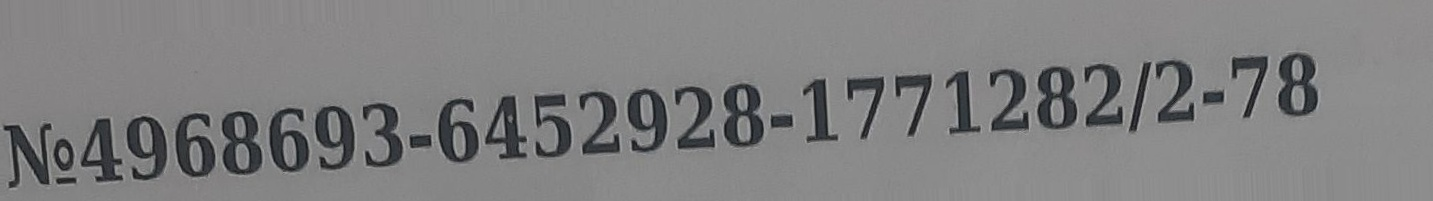

In [6]:
print("Исходная картинка:")
img = cv2.imread('/content/test_area_skewed.jpeg')
cv2_imshow(img)

Картинка после выравнивания:


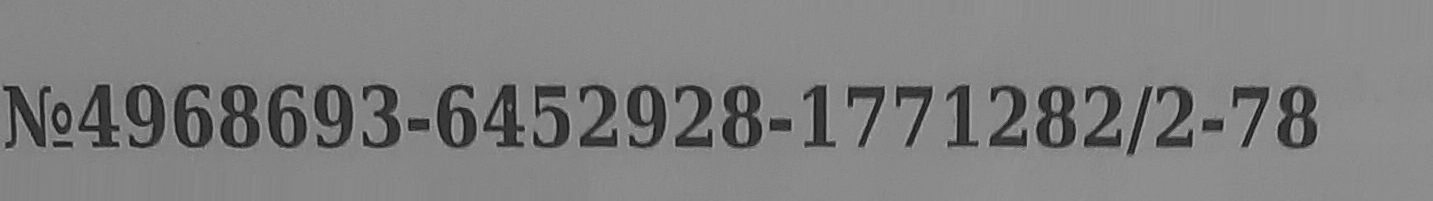

In [7]:
# выравниваем:
print("Картинка после выравнивания:")
angle, corrected = correct_skew(img)
cv2_imshow(corrected)